# DA_HW05 R09546035 李冠德

# Q1-(a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from numpy import linalg as LA
from sklearn import preprocessing

In [2]:
def FA(X, isCorrMX, number_of_factors, standardize = False, explain = False, draw_face = False):

    # standardize
    if standardize == True:
        X = preprocessing.scale(X)
        X = pd.DataFrame(X)

    # using corr matrix or cov matrix
    Z = X-X.mean()
    if isCorrMX == True:
        S = Z.corr()
    else:
        S = Z.cov()

    # calculate eigenvalues and eigenvectors
    eigen_values, eigen_vectors = LA.eig(S)

    # for Q2-(c)
    if explain == True:
        # sort eigenvalue
        eigen_values = list(eigen_values)
        eigen_values.sort(reverse=True)
        eigenvalues_totals = sum(eigen_values)
        eigen_values = pd.Series(eigen_values)

        # calculate explainable ratio of each factor
        cumulative_list = []
        cumulative_ratio = 0
        for i in range(eigen_values.shape[0]):
            ratio = eigen_values[i] / eigenvalues_totals
            cumulative_ratio += ratio
            cumulative_list.append(cumulative_ratio)

        # to show how many factors are needed to explain variance
        record = 0 # 防止重複進入迴圈
        print()
        for i in range(len(cumulative_list)):
            if cumulative_list[i] >= 0.9 and record <= 4:
                record += 1
                print(str(i + 1), 'factors are needed to explain 90% the total variance')
                break
            elif cumulative_list[i] >= 0.8 and record <= 3:
                record += 1
                print(str(i + 1), 'factors are needed to explain 80% the total variance')

            elif cumulative_list[i] >= 0.7 and record <= 2:
                record += 1
                print(str(i + 1), 'factors are needed to explain 70% the total variance')

            elif cumulative_list[i] >= 0.6 and record <= 1:
                record += 1
                print(str(i + 1), 'factors are needed to explain 60% the total variance')  

            elif cumulative_list[i] >= 0.5 and record == 0:
                record += 1
                print(str(i + 1), 'factors are needed to explain 50% the total variance') 
        return

    # select q factor & estimate A by Principal Component 
    FA_eigenvalue = eigen_values[range(0,number_of_factors)]
    FA_eigenvector = eigen_vectors[:,range(0,number_of_factors)]
    AT = FA_eigenvector.dot(np.diag(np.sqrt(FA_eigenvalue)))
    A = AT.T
    if draw_face == False:
        print('\033[1;34mThe loading matrix = \033[0m','\n',AT)

    # calculate phi
    ATA = AT.dot(A)
    uniqueness = ((X.cov() - ATA).values).diagonal()
    phi = np.diag(uniqueness)

    # using Weighted Least Squares to estimate the F
    phi_inverse = np.linalg.inv(phi)
    F1 = (X.dot(phi_inverse)).dot(AT)      # 算 F 的前半部
    F2 = (A.dot(phi_inverse)).dot(AT)      # 算 F 的後半部(還沒 inverse)
    F2_inverse = np.linalg.inv(F2)         
    F = (F1.dot(F2_inverse)).values
    if draw_face == False:
        print('\n', '\033[1;34mThe factor matrix (head) = \033[0m','\n',F[:5])

    # draw face
    if draw_face == True: 
             
        # find first factor 
        FA_eigenvalue = list(FA_eigenvalue)
        first_index = FA_eigenvalue.index(max(FA_eigenvalue))
        first_factor = F.T[first_index]

        # change to [0, 255]
        old_value =  first_factor
        old_min = min(first_factor)
        old_max = max(first_factor)
        new_first_PC = ( ( old_value - old_min ) / (old_max - old_min) ) * (255 - 0) + 0

        # draw
        pic = np.array(new_first_PC, dtype='uint8').reshape(56,46) #畫在圖上 白點為特徵
        img = Image.fromarray(pic, 'L')
        img = img.resize((138, 168))

        return img

    # calculate hi_square
    communality = sum(A*A)
    print('\n', '\033[1;34mThe communality vactor = \033[0m','\n', communality)
    
    # print uniqueness
    print('\n', '\033[1;34mThe uniqueness vector = \033[0m','\n', uniqueness)

    # calculate proportion of total sample variance due to the ith factor 
    total_variance = sum(communality + uniqueness)
    for i in range(len(FA_eigenvalue)):
        proportion = FA_eigenvalue[i] / total_variance
        print('\n', '\033[1;34mThe vector of the proportions of total variance contribution by the %dth factor = \033[0m' 
        % (i+1),'\n', proportion)

# Q1-(b)

在使用 FA 之後，可以藉由 loading matrix 找出變數與 factor 之間的相關性。 但如果使用的是 PCA 就無法發現變數之間的關係。
另外，可以發現在 PCA 中，全部的 PC 都要用到，才能重現原來的資料，但在 FA 中，只要幾個 factor 即可重現。
PCA 的重點在解釋資料的變異量，而 FA 的重點在解釋變相間的相關

In [3]:
# loading data
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
df = pd.read_table(r'C:/Users/x5134/Desktop/Datasets/auto-mpg.data.txt', delim_whitespace=True, names=columns) 

# Tidy data ( 因為 "horsepower == ?"" 的資料不多, 因此選擇直接忽視 )
df = df[df.horsepower != '?'] 
df.horsepower =df.horsepower.astype('float') 
auto_mpg = df.drop(['mpg', 'car name'], axis=1) 

In [4]:
# start training
FA(X = auto_mpg, isCorrMX = True, number_of_factors = 2, standardize = False) 

The loading matrix =  
 [[ 0.94088961  0.11655335]
 [ 0.97363466  0.10417141]
 [ 0.93968549 -0.13810299]
 [ 0.92763528  0.1966014 ]
 [-0.63934801  0.46750447]
 [-0.46115385  0.62293543]
 [-0.64333247 -0.50126082]]

 The factor matrix (head) =  
 [[-8.98074499  9.27875381]
 [-8.79942376  9.04724819]
 [-8.68510409  8.90191133]
 [-8.95815935  9.2497476 ]
 [-8.56276886  8.74625173]]

 The communality vactor =  
 [0.89885793 0.95881614 0.90208125 0.89915932 0.6273263  0.60071143
 0.66513908]

 The uniqueness vector =  
 [ 2.01083855e+00  1.09494087e+04  1.48066731e+03  7.21483810e+05
  6.98400493e+00  1.29692035e+01 -1.62795390e-02]

 The vector of the proportions of total variance contribution by the 1th factor =  
 6.283961126659609e-06

 The vector of the proportions of total variance contribution by the 2th factor =  
 1.2808002504650384e-06


# Q2-(c)

In [5]:
import cv2
import os
import pandas as pd 

# import female data
image = os.listdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/female') # 讀取檔案資料
img_female = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/female') # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列 
    img_female += [irow]                                      # 將所有圖片一維陣列儲存在一個集合    
female = pd.DataFrame(img_female)                             # 輸出成資料框並命名
female['label'] = 0                                           # add label

# import male data
image = os.listdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/male') # 讀取檔案資料
img_male = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/male')   # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列
    img_male += [irow]                                        # 將所有圖片一維陣列儲存在一個集合
male = pd.DataFrame(img_male)                                 # 輸出成資料框並命名
male['label'] = 1                                             # add label

# concat two data
total = pd.concat([female,male], axis = 0, join = 'inner') # concat female and male data
total.index = range(0,400)                                 # rename index
total = (total.drop(['label'], axis = 1))                  # drop label, let shape become (400, 2576)

total_labels = pd.concat([female['label'], male['label']], axis = 0,join = 'inner') # concat label
total_labels.index = range(0,400)

In [6]:
FA(X = total.T, isCorrMX = True, number_of_factors = 0, standardize = False, explain = True)


2 factors are needed to explain 50% the total variance
4 factors are needed to explain 60% the total variance
7 factors are needed to explain 70% the total variance
17 factors are needed to explain 80% the total variance
50 factors are needed to explain 90% the total variance


In [7]:
FA(X = total.T, isCorrMX = False, number_of_factors = 0, standardize = False, explain = True)


2 factors are needed to explain 50% the total variance
3 factors are needed to explain 60% the total variance
6 factors are needed to explain 70% the total variance
15 factors are needed to explain 80% the total variance
47 factors are needed to explain 90% the total variance


# Q2-(a)


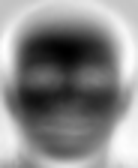

In [8]:
# when isCorrMX = True
# on condition of explaining 80% of total variance, I set number of factor = 17
FA(X = total.T, isCorrMX = True, number_of_factors = 17, standardize = False, draw_face = True)

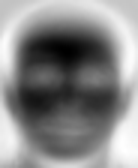

In [9]:
# when isCorrMX = Flase
# on condition of explaining 80% of total variance, I set number of factor = 15
FA(X = total.T, isCorrMX = False, number_of_factors = 15, standardize = False, draw_face = True)